# Demo RNA Multi-Perceptrón Backpropagation para identificar clase de IRIS
Adaptado de https://www.tensorflow.org/tutorials/estimator/premade

1) Cargar librerías:

In [21]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd

from  sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Librerías cargadas")

Librerías cargadas


2) Cargar los datos:

In [22]:
# define atributos y clases
CSV_COLUMN_NAMES = ['LargoSepalo', 'AnchoSepalo', 'LargoPetalo', 'AnchoPetalo', 'Clase']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

# levanta los datos de entrenamiento y prueba
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

# genera los datos solo com la clase para entrenar y probar
train_y = train.pop('Clase')
test_y = test.pop('Clase')

print("\n\nDatos Originales ", len(train)+len(test))
print("- Datos para Entrenar ", len(train))
print("- Datos para Probar ", len(test))



Datos Originales  150
- Datos para Entrenar  120
- Datos para Probar  30


In [23]:
# ver datos
train.head()
#test.head()

,LargoSepalo,AnchoSepalo,LargoPetalo,AnchoPetalo
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


3) Definir funciones auxiliares para el entrenamiento:

In [0]:
# funciones auxiliares para entrenar y probar 
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

    
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

4) Establecer el modelo para la RNA

In [25]:
# Construcye un estimador tipo RNA 'Deep' Neuronal Network classifier
classifier = tf.estimator.DNNClassifier(
    
    feature_columns=my_feature_columns,

    hidden_units=[20, 8], # 2 capas de 20 y 8 neuronas ocultas    
    
    n_classes=3) # identifica 3 clases



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpb9hgozl_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


5) Entrenar el modelo de la RNA:

In [26]:
# Train the Model.
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=10000) 

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpb9hgozl_/model.ckpt.
INFO:tensorflow:loss = 1.0782142, step = 0
INFO:tensorflow:global_step/sec: 396.88
INFO:tensorflow:loss = 0.95584893, step = 100 (0.254 sec)
INFO:tensorflow:global_step/sec: 486.768
INFO:tensorflo

6) Evaluar el modelo de la RNA entrenado:

In [27]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nExactitud: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-01T22:41:50Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpb9hgozl_/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.23521s
INFO:tensorflow:Finished evaluation at 2020-02-01-22:41:50
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.96666664, aver

7) Mostrar el detalle con predicciones sobre datos de Prueba:


 Resultados: 
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpb9hgozl_/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Clase predecida es "Versicolor"[1] (67.6%), la correcta es "Versicolor"[1] 
Clase predecida es "Virginica"[2] (57.0%), la correcta es "Virginica"[2] 
Clase predecida es "Setosa"[0] (85.9%), la correcta es "Setosa"[0] 
Clase 

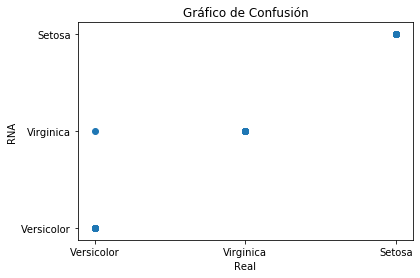

In [28]:
# funciones auxiliares
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

predictions = classifier.predict(
    input_fn=lambda: input_fn(test))


# muestra resultados de la predicción
classPreds = []
classReal = []
cantOK = 0
cantError = 0
print("\n Resultados: ")
for pred_dict, expec in zip(predictions, test_y):
    pred_class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][pred_class_id]
    
    classPreds.append(SPECIES[pred_class_id])
    classReal.append(SPECIES[expec])

    if (pred_class_id == expec): 
      res = ""
      cantOK += 1
    else: 
      res = "!"
      cantError += 1

    print('Clase predecida es "{}"[{}] ({:.1f}%), la correcta es "{}"[{}]{} '.format(
        SPECIES[pred_class_id], pred_class_id, 100 * probability, SPECIES[expec], expec, res))

print('=== Total Ejemplos: {}, con {} predicciones ok y {} errores.'.format(cantOK+cantError, cantOK, cantError))

# gráfico de comparación
plt.title('Gráfico de Confusión')
plt.xlabel('Real')
plt.ylabel('RNA')
plt.scatter(classReal, classPreds)

# muestra reporte de clasificación
print("\n Reporte de Clasificación: ")
print(classification_report(classReal, classPreds))

# muestra matriz de confusion
print('\nMatriz de Confusión: ')
cm = confusion_matrix(classReal, classPreds, labels=SPECIES)
cmtx = pd.DataFrame(
    cm, 
    index=['r:{:}'.format(x) for x in SPECIES], 
    columns=['p:{:}'.format(x) for x in SPECIES]
  )
print(cmtx)
print("\n")


*) Hacer pruebas de predicciones:

In [0]:
# define ejemplos de prueba
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'LargoSepalo': [5.1, 5.9, 6.9],
    'AnchoSepalo': [3.3, 3.0, 3.1],
    'LargoPetalo': [1.7, 4.2, 5.4],
    'AnchoPetalo': [0.5, 1.5, 2.1],
}


In [30]:
# funciones auxiliares
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

predictions = classifier.predict(
    input_fn=lambda: input_fn(predict_x))


# muestra resultados de la predicción
for pred_dict, expec in zip(predictions, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Clase predecida es "{}" ({:.1f}%), la correcta es "{}"'.format(
        SPECIES[class_id], 100 * probability, expec))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpb9hgozl_/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Clase predecida es "Setosa" (85.9%), la correcta es "Setosa"
Clase predecida es "Versicolor" (67.6%), la correcta es "Versicolor"
Clase predecida es "Virginica" (57.0%), la correcta es "Virginica"
